### TensorFlow 2 Introduction

In [1]:
import tensorflow as tf

# check to see that we have properly installed tensorflow 2
print(tf.__version__)

2.4.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Generation

In [3]:
N_observations = 10000

xs = np.random.uniform(low=-10, high=10, size=(N_observations, 1))
zs = np.random.uniform(low=-10, high=10, size=(N_observations, 1))
noise = np.random.uniform(-1, 1, (N_observations, 1))

generated_inputs = np.column_stack((xs, zs))
generated_targets = 2 * xs - 3 * zs + 5 + noise

In [4]:
np.savez('./out/TF_intro', inputs=generated_inputs, targets=generated_targets)

### Solving with TensorFlow

In [5]:
training_data = np.load('./out/TF_intro.npz')

In [6]:
input_size = 2
output_size = 1

In [7]:
# in TF2, we must build the model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(output_size,
                              kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                              bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                             )
])

In [8]:
# original where we use the optimizer from TF without specifying additional parameters
# model.compile(optimizer='sgd', loss='mean_squared_error')

In [8]:
# NEW where we get to set the learning rate
custom_opt_func = tf.keras.optimizers.SGD(learning_rate=0.02)

# NEW change the loss function
model.compile(optimizer=custom_opt_func, loss='mean_squared_error')
# model.compile(optimizer=custom_opt_func, loss='huber_loss')

In [9]:
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
313/313 - 2s - loss: 3.2530
Epoch 2/100
313/313 - 1s - loss: 0.3753
Epoch 3/100
313/313 - 0s - loss: 0.3872
Epoch 4/100
313/313 - 0s - loss: 0.3910
Epoch 5/100
313/313 - 0s - loss: 0.3854
Epoch 6/100
313/313 - 0s - loss: 0.3902
Epoch 7/100
313/313 - 1s - loss: 0.3905
Epoch 8/100
313/313 - 0s - loss: 0.3734
Epoch 9/100
313/313 - 0s - loss: 0.3877
Epoch 10/100
313/313 - 0s - loss: 0.3751
Epoch 11/100
313/313 - 0s - loss: 0.3867
Epoch 12/100
313/313 - 0s - loss: 0.3710
Epoch 13/100
313/313 - 0s - loss: 0.3824
Epoch 14/100
313/313 - 0s - loss: 0.3882
Epoch 15/100
313/313 - 0s - loss: 0.3727
Epoch 16/100
313/313 - 0s - loss: 0.3846
Epoch 17/100
313/313 - 0s - loss: 0.3850
Epoch 18/100
313/313 - 0s - loss: 0.3791
Epoch 19/100
313/313 - 0s - loss: 0.3951
Epoch 20/100
313/313 - 0s - loss: 0.3816
Epoch 21/100
313/313 - 0s - loss: 0.3729
Epoch 22/100
313/313 - 0s - loss: 0.3871
Epoch 23/100
313/313 - 0s - loss: 0.3827
Epoch 24/100
313/313 - 0s - loss: 0.3843
Epoch 25/100
313/313 - 0s

### Extract Weights and Biases

In [10]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9760479],
       [-3.0048745]], dtype=float32)

In [11]:
biases = model.layers[0].get_weights()[1]
biases

array([4.9895654], dtype=float32)

### Make Predictions

In [12]:
model.predict_on_batch(training_data['inputs']).round(2)

array([[  5.16],
       [-23.05],
       [ -6.74],
       ...,
       [ -4.24],
       [ 16.62],
       [  4.92]], dtype=float32)

In [14]:
# optional: compare with our target values
# training_data['targets']

### Plot the Data

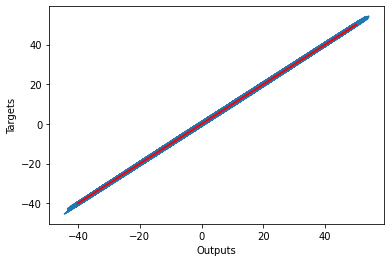

In [13]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),  
         np.squeeze(training_data['targets']))

x45 = [-40, 50]
y45 = [-40, 50]
plt.plot(x45, y45, 'r-', lw=2)

plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()

In [15]:
# mean absolute error
y_pred = model.predict_on_batch(training_data['inputs'])
y_pred.shape

(10000, 1)

In [17]:
y_test = training_data['targets']
y_test.shape

(10000, 1)

In [18]:
abs_error = np.abs(y_pred - y_test)
abs_error.shape

(10000, 1)

In [19]:
mae = np.mean(abs_error)
mae

0.5109615566548703

In [20]:
mean_value = np.mean(y_test)
mean_value

5.362570469910676

In [23]:
mae_perc = 100.0 * (mae / mean_value)
print(mae_perc.round(2), "%")

9.53 %


In [24]:
sq_error = (y_pred - y_test) ** 2
mse = np.mean(sq_error)
rmse = np.sqrt(mse)
rmse

0.594695911166779

In [25]:
rmse_perc = 100.0 * (rmse / mean_value)
print(rmse_perc.round(2), "%")

11.09 %
